# CS:GO Round Winner Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d christianlillelund/csgo-round-winner-classification

Dataset URL: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification
License(s): CC0-1.0
100%|███████████████████████████████████████| 3.53M/3.53M [00:10<00:00, 372kB/s]
100%|███████████████████████████████████████| 3.53M/3.53M [00:10<00:00, 352kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/CS:GO Round Winner Classification/csgo-round-winner-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/CS:GO Round Winner Classification')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [5]:
df.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

In [6]:
df.shape

(122410, 97)

In [7]:
df.size

11873770

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [9]:
df.describe().T

count        mean         std   min     25%  \
time_left                    122410.0   97.886922   54.465238  0.01   54.92   
ct_score                     122410.0    6.709239    4.790362  0.00    3.00   
t_score                      122410.0    6.780435    4.823543  0.00    3.00   
ct_health                    122410.0  412.106568  132.293290  0.00  350.00   
t_health                     122410.0  402.714500  139.919033  0.00  322.00   
...                               ...         ...         ...   ...     ...   
t_grenade_incendiarygrenade  122410.0    0.019819    0.143933  0.00    0.00   
ct_grenade_molotovgrenade    122410.0    0.048011    0.227669  0.00    0.00   
t_grenade_molotovgrenade     122410.0    1.352095    1.663246  0.00    0.00   
ct_grenade_decoygrenade      122410.0    0.027694    0.169531  0.00    0.00   
t_grenade_decoygrenade       122410.0    0.025750    0.164162  0.00    0.00   

                                50%       75%    max  
time_left                     94.91  166.9175  175.0  
ct_score                       6.00   10.0000   32.0  
t_score                        6.00   10.0000   33.0  
ct_health                    500.00  500.0000  500.0  
t_health                     500.00  500.0000  600.0  
...                             ...       ...    ...  
t_grenade_incendiarygrenade    0.00    0.0000    3.0  
ct_grenade_molotovgrenade      0.00    0.0000    3.0  
t_grenade_molotovgrenade       1.00    2.0000    5.0  
ct_grenade_decoygrenade        0.00    0.0000    3.0  
t_grenade_decoygrenade         0.00    0.0000    2.0  

[94 rows x 8 columns]

In [10]:
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [11]:
df.duplicated().sum()

np.int64(4962)

In [12]:
df.nunique()

time_left                    10782
ct_score                        33
t_score                         34
map                              8
bomb_planted                     2
                             ...  
ct_grenade_molotovgrenade        4
t_grenade_molotovgrenade         6
ct_grenade_decoygrenade          4
t_grenade_decoygrenade           3
round_winner                     2
Length: 97, dtype: int64

In [13]:
df['round_winner'].value_counts()

round_winner
T     62406
CT    60004
Name: count, dtype: int64

## Data Visualization

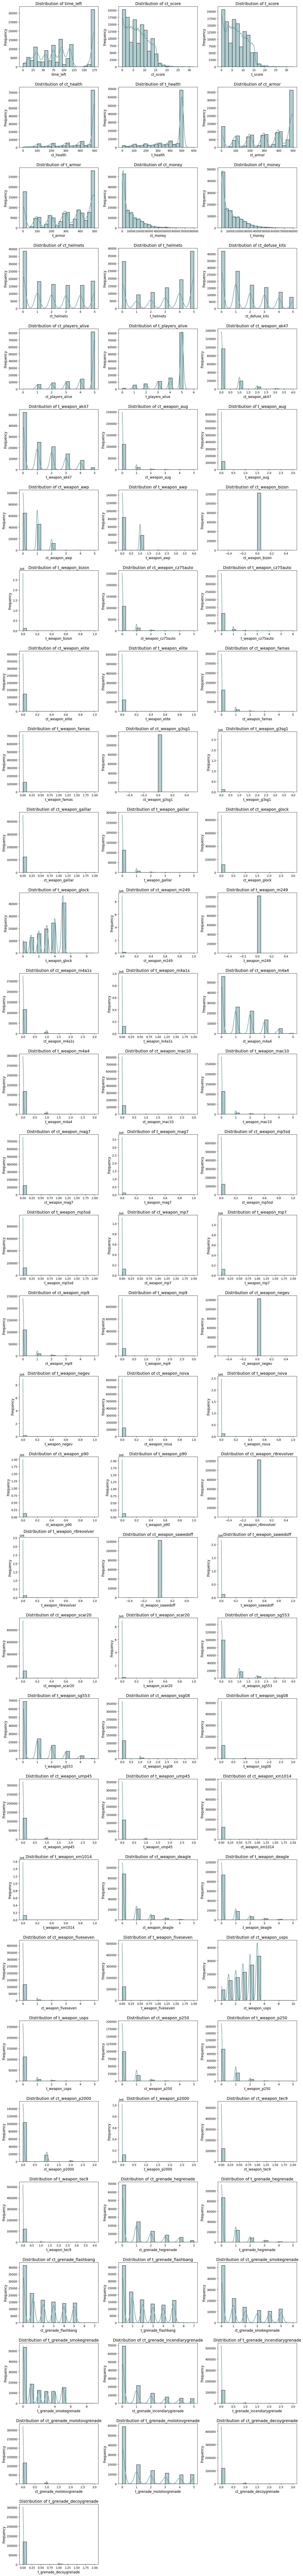

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True, axis=1)

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

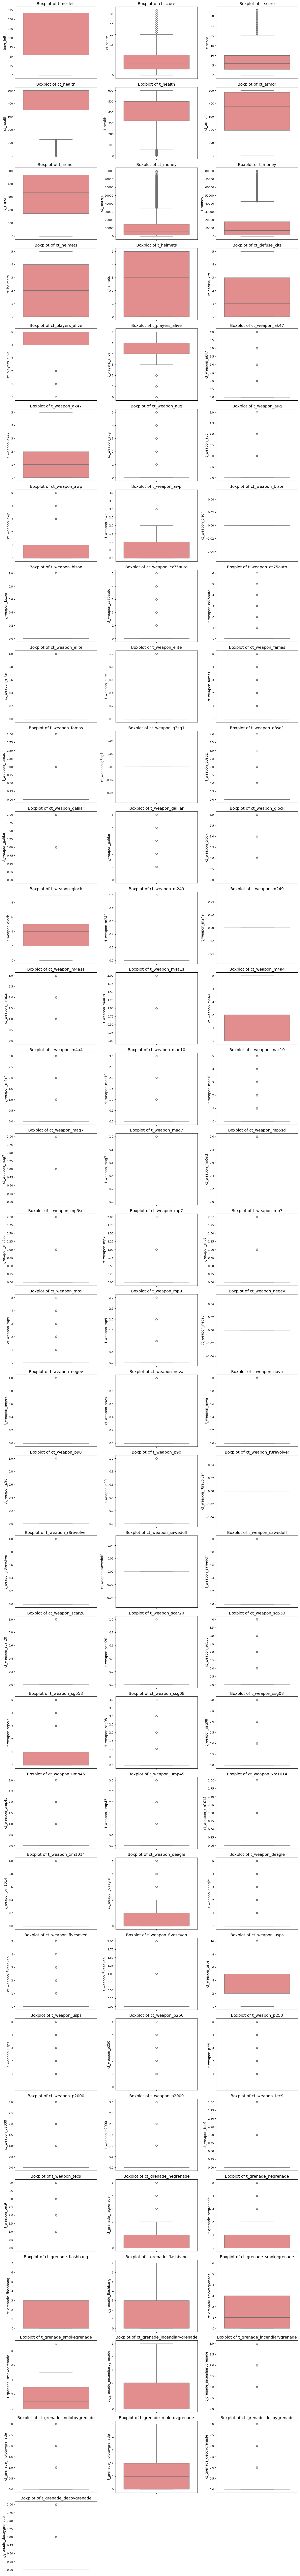

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

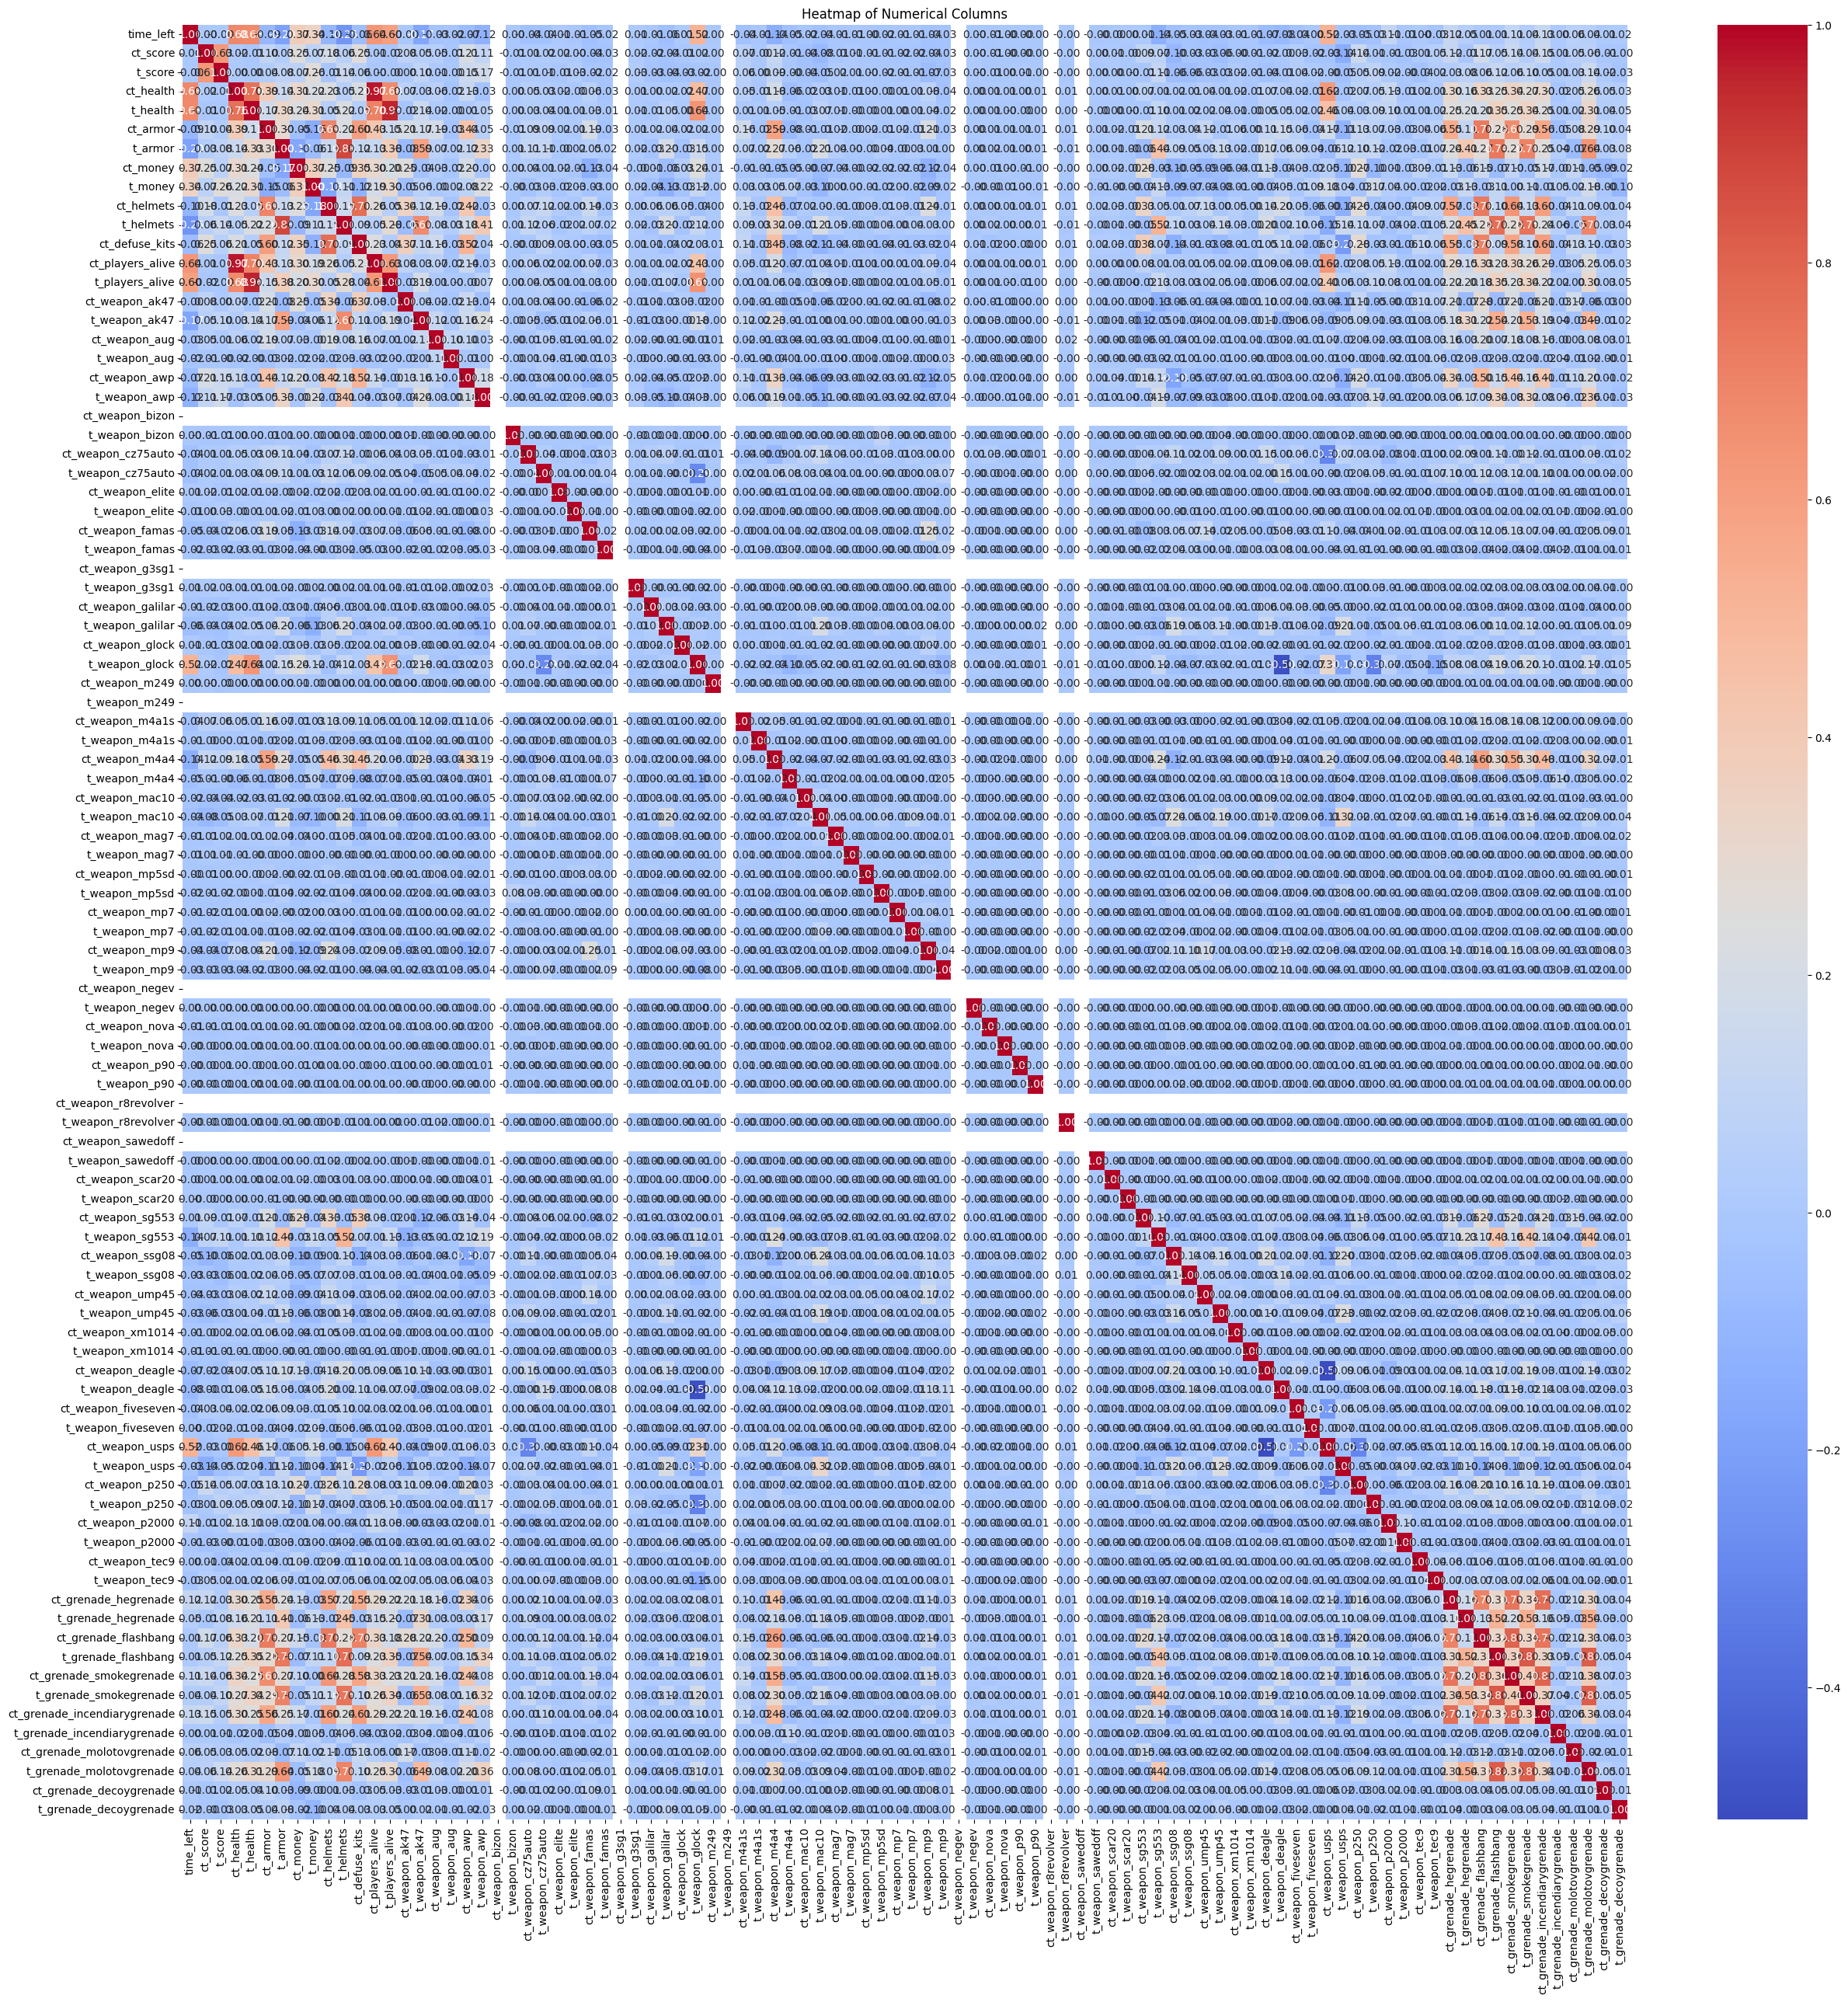

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(30, 30))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

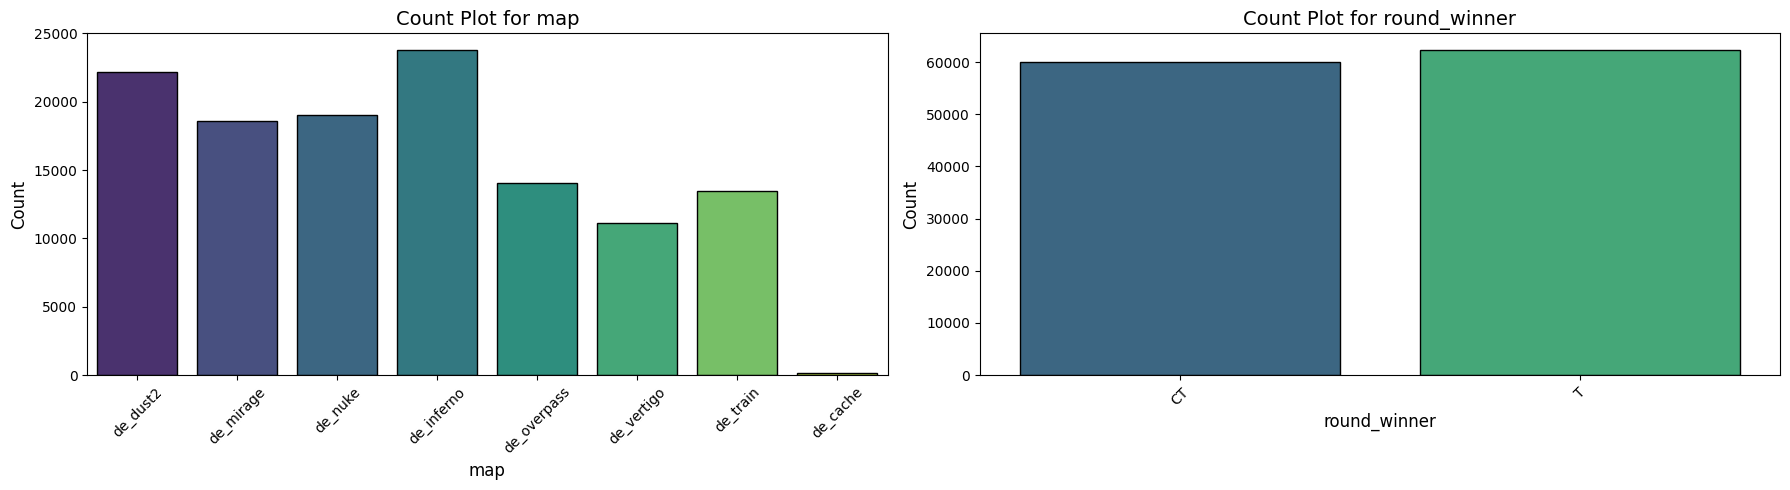

In [17]:
# Plotting each categorical column as a count plot

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [3]:
# Dropping duplicated column

df.drop_duplicates(inplace=True)

In [4]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117448 entries, 0 to 122409
Data columns (total 94 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   time_left                     117448 non-null  int64
 1   ct_score                      117448 non-null  int64
 2   t_score                       117448 non-null  int64
 3   map                           117448 non-null  int64
 4   bomb_planted                  117448 non-null  int64
 5   ct_health                     117448 non-null  int64
 6   t_health                      117448 non-null  int64
 7   ct_armor                      117448 non-null  int64
 8   t_armor                       117448 non-null  int64
 9   ct_money                      117448 non-null  int64
 10  t_money                       117448 non-null  int64
 11  ct_helmets                    117448 non-null  int64
 12  ct_defuse_kits                117448 non-null  int64
 13  ct_weapon_ak47     

In [5]:
# Dropping highly correlated features

def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

df, dropped_columns = remove_highly_correlated_features(df, threshold=0.85)
print("Dropped Columns:", dropped_columns)


Dropped Columns: ['t_helmets', 'ct_players_alive', 't_players_alive']


In [ ]:
X = df.drop(['round_winner'],axis=1)
y = df['round_winner']

In [9]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [10]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [12]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7475521498510004, 0.7590889740315028, 0.8085142613878246, 0.8718177948063005, 0.7531289910600255, 0.7669220945083014, 0.8433375904640272, 0.8145168156662409, 0.7489995742869306]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     11488
           1       0.75      0.76      0.75     12002

    accuracy                           0.75     23490
   macro avg       0.75      0.75      0.75     23490
weighted avg       0.75      0.75      0.75     23490

Confusion Matrix:
 [[8482 3006]
 [2924 9078]]


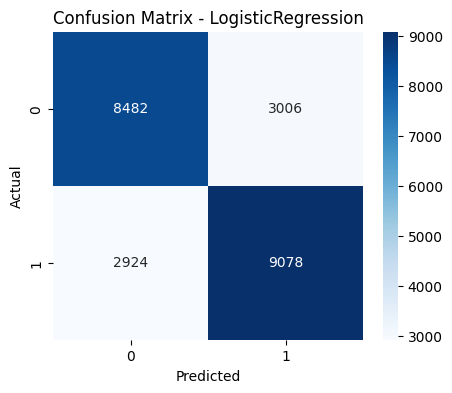

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76     11488
           1       0.78      0.74      0.76     12002

    accuracy                           0.76     23490
   macro avg       0.76      0.76      0.76     23490
weighted avg       0.76      0.76      0.76     23490

Confusion Matrix:
 [[8919 2569]
 [3090 8912]]


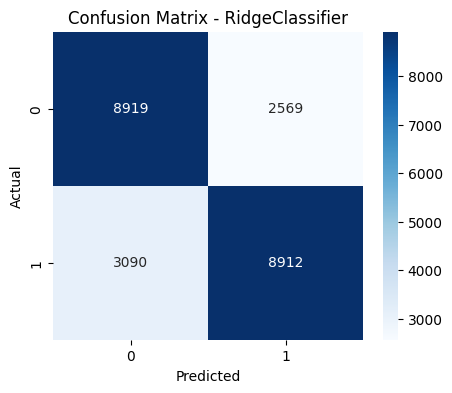

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81     11488
           1       0.83      0.79      0.81     12002

    accuracy                           0.81     23490
   macro avg       0.81      0.81      0.81     23490
weighted avg       0.81      0.81      0.81     23490

Confusion Matrix:
 [[9475 2013]
 [2485 9517]]


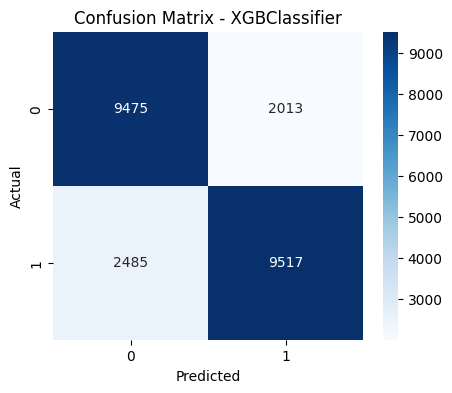

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     11488
           1       0.89      0.86      0.87     12002

    accuracy                           0.87     23490
   macro avg       0.87      0.87      0.87     23490
weighted avg       0.87      0.87      0.87     23490

Confusion Matrix:
 [[10184  1304]
 [ 1667 10335]]


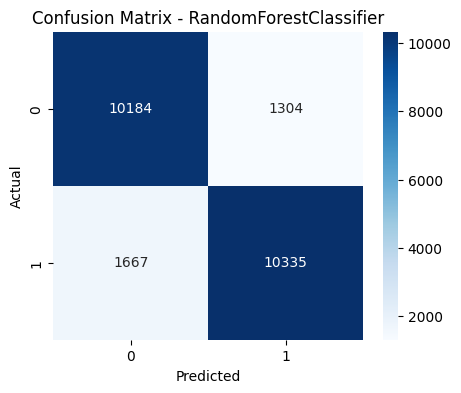

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76     11488
           1       0.78      0.72      0.75     12002

    accuracy                           0.75     23490
   macro avg       0.75      0.75      0.75     23490
weighted avg       0.75      0.75      0.75     23490

Confusion Matrix:
 [[9015 2473]
 [3326 8676]]


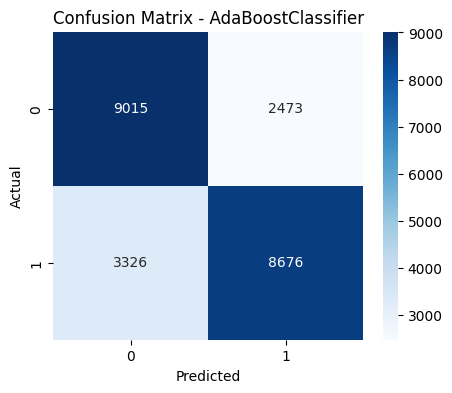

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77     11488
           1       0.79      0.74      0.76     12002

    accuracy                           0.77     23490
   macro avg       0.77      0.77      0.77     23490
weighted avg       0.77      0.77      0.77     23490

Confusion Matrix:
 [[9129 2359]
 [3116 8886]]


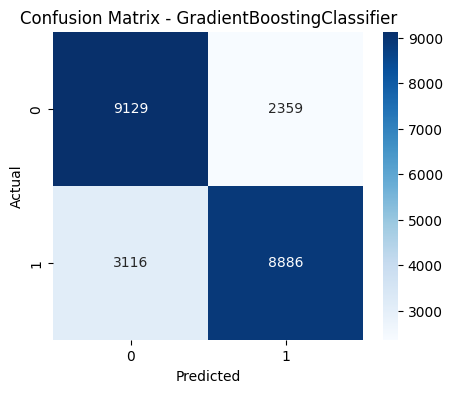

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     11488
           1       0.88      0.81      0.84     12002

    accuracy                           0.85     23490
   macro avg       0.85      0.85      0.85     23490
weighted avg       0.85      0.85      0.85     23490

Confusion Matrix:
 [[10118  1370]
 [ 2234  9768]]


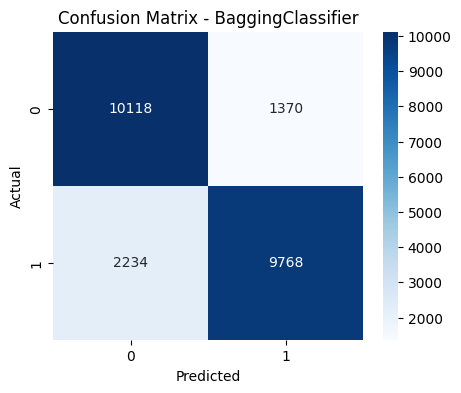

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81     11488
           1       0.82      0.82      0.82     12002

    accuracy                           0.82     23490
   macro avg       0.82      0.82      0.82     23490
weighted avg       0.82      0.82      0.82     23490

Confusion Matrix:
 [[9369 2119]
 [2212 9790]]


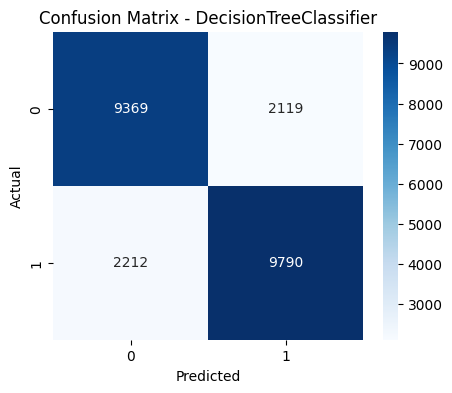

In [ ]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()